In [1]:
import pandas as pd
import healpy as hp
import numpy as np

In [2]:
nside = 256
nside_new = 64

In [3]:
df = pd.read_csv("/home/wangsy/CHIME/data/WISExSCOS/wiseScosSvm.csv")

In [4]:
list(df)

['wiseX',
 'wiseID',
 'scosID',
 'cx',
 'cy',
 'cz',
 'htmID',
 'ra',
 'dec',
 'ebv',
 'w1mCorr',
 'w1mCorrErr',
 'w2mCorr',
 'w2mCorrErr',
 'bCalCorr',
 'bCalCorrErr',
 'rCalCorr',
 'rCalCorrErr',
 'zPhoto_ANN',
 'zPhoto_Corr',
 'fromAllSky',
 'SVMClass',
 'probGal',
 'probStar',
 'probQso',
 'inPhotozCat']

In [5]:
ra = np.array(df['ra']).astype(float)
dec = np.array(df['dec']).astype(float)
z = np.array(df['zPhoto_ANN']).astype(float)
p_gal = np.array(df['probGal']).astype(float)

In [8]:
df = df[(df.zPhoto_ANN>=0)&(df.zPhoto_ANN<=0.5)&(df.probGal>=0.9)]

In [9]:
ra = np.array(df['ra']).astype(float)
dec = np.array(df['dec']).astype(float)
z = np.array(df['zPhoto_ANN']).astype(float)

In [ ]:
#df

,wiseX,wiseID,scosID,cx,cy,cz,htmID,ra,dec,ebv,...,rCalCorr,rCalCorrErr,zPhoto_ANN,zPhoto_Corr,fromAllSky,SVMClass,probGal,probStar,probQso,inPhotozCat
45,J113904.76-492713.6,1741050001351057611,282402691068755,0.275270,-0.630826,0.725455,10240595408543,174.769849,-49.453787,0.135761,...,19.156,0.078,0.139363,0.139363,0,1,0.980676,0.017996,0.001328,0
59,J113804.26-491629.1,1741050001351057699,282402691122668,0.086973,-0.541143,0.836421,10240812425847,174.517751,-49.274763,0.204977,...,19.426,0.095,0.175306,0.175306,0,1,0.925816,0.045459,0.028725,0
96,J113820.34-491919.0,1741050001351057968,282402691108671,0.131734,-0.571962,0.809633,10240797184160,174.584764,-49.321956,0.189080,...,19.275,0.086,0.147408,0.147408,0,1,0.961381,0.033205,0.005414,0
144,J113728.38-492956.8,1741050001351059129,282402691054858,0.007129,-0.720412,0.693509,10240777467535,174.368288,-49.499134,0.178937,...,16.750,0.060,0.136793,0.136793,0,1,0.987295,0.000436,0.012270,0
150,J113718.33-491453.9,1741050001351059160,282402691130666,-0.016817,-0.525504,0.850625,10240806767593,174.326402,-49.248309,0.200263,...,17.291,0.061,0.193089,0.193089,0,1,0.993535,0.000370,0.006095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39816019,J113825.88-491905.0,1741050001351056977,282402691109800,0.144122,-0.565721,0.811905,10240797420709,174.607844,-49.318075,0.180940,...,17.141,0.061,0.170868,0.170868,0,1,0.948343,0.005289,0.046367,0
39816022,J113830.76-491620.5,1741050001351056993,282402691123437,0.145560,-0.526341,0.837721,10240811541022,174.628199,-49.272385,0.199194,...,18.537,0.067,0.300458,0.300458,0,1,0.986677,0.001529,0.011794,0
39816039,J113906.36-491716.3,1741050001351057034,282402691118829,0.226974,-0.510845,0.829168,10240790482580,174.776505,-49.287864,0.161482,...,17.588,0.061,0.110388,0.110388,0,1,0.998207,0.001513,0.000280,0
39816045,J113933.78-492407.4,1741050001351057079,282402691084350,0.329858,-0.559894,0.760074,10240569327819,174.890791,-49.402056,0.149967,...,19.308,0.083,0.316790,0.316790,0,1,0.915739,0.006524,0.077737,0


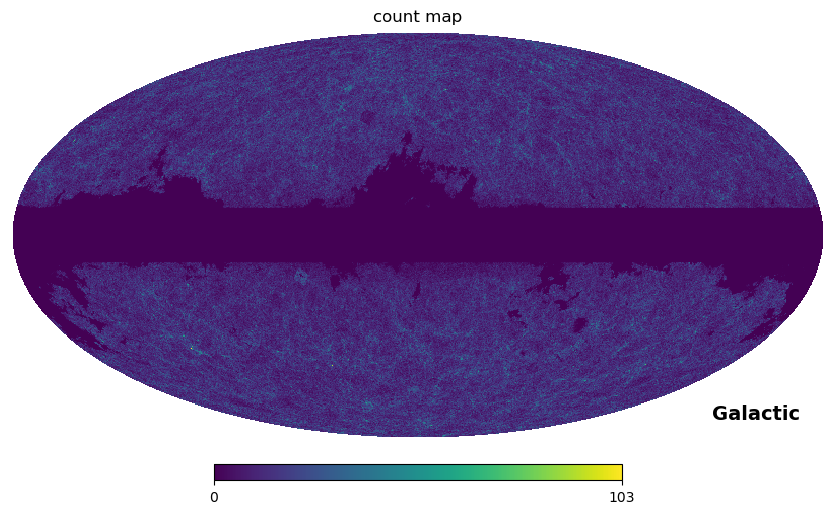

In [10]:
dec_ra = hp.ang2pix(nside, np.radians(90-dec), np.radians(ra), nest=False)
pix_N = np.bincount(dec_ra, minlength=12*nside*nside)
hp.mollview(pix_N, title='count map', coord="CG")

In [ ]:
#mask_file = fits.open('/home/wangsy/data/WISExSCOS/WISExSCOSmask.fits')   #nside=256

#mask_file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [ ]:
#mask_file.info()

Filename: /home/wangsy/data/WISExSCOS/WISExSCOSmask.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  xtension      1 BinTableHDU     18   768R x 1C   [1024E]   


In [ ]:
#mask_file[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / length of dimension 1                          
NAXIS2  =                  768 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'I       '                                                            
TFORM1  = '1024E   '                                                            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
EXTNAME = 'xtension'        

# mask1

In [5]:
mask1 = np.ones(hp.nside2npix(nside))
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
lat = np.degrees(np.pi/2 - theta)
lon = np.degrees(phi)
mask1[(np.abs(lat) <= 20) & (lon >= 0) & (lon <= 30) ] = 0

mask2 = np.ones(hp.nside2npix(nside))
mask2[(np.abs(lat) <= 18) & (lon >= 30) & (lon <= 60) ] = 0

mask3 = np.ones(hp.nside2npix(nside))
mask3[(np.abs(lat) <= 17) ] = 0

mask = mask1 * mask2 * mask3

# mask2

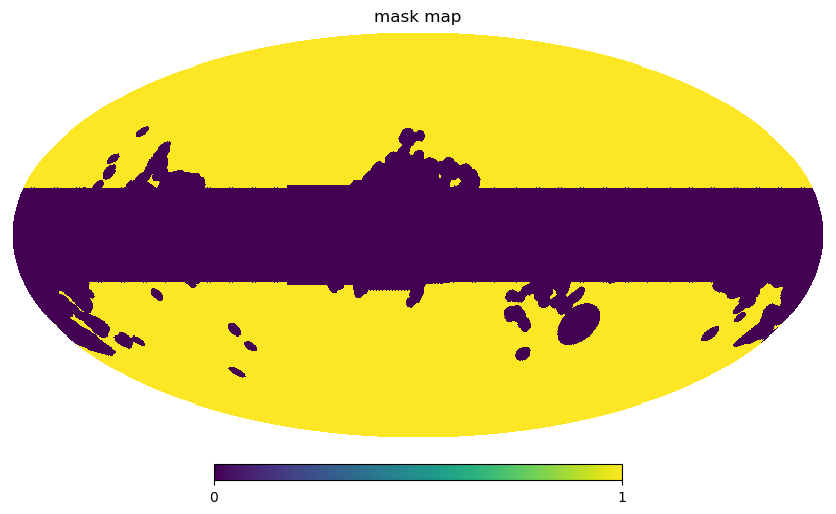

In [6]:
maskkk=hp.fitsfunc.read_map('/home/wangsy/data/WISExSCOS/WISExSCOSmask.fits', nest=False)
maskk=maskkk * mask
hp.mollview(maskk, title='mask map')

# 修改map的nside并保存为fits文件(nside, nest=False-RING)

In [7]:
#pix_N_new = hp.pixelfunc.ud_grade(pix_N, nside_out=nside_new, order_in='RING', order_out='RING')
mask_new = hp.pixelfunc.ud_grade(maskk, nside_out=nside_new, order_in='RING', order_out='RING')

In [8]:
#hp.fitsfunc.write_map('/home/wangsy/code/WISExSCOS/wise_scos.fits', m=pix_N_new, nest=False, fits_IDL=nside_new, coord='CG',overwrite=True)
hp.fitsfunc.write_map('wise_scos_mask.fits', m=mask_new, nest=False, fits_IDL=nside_new, coord='CG',overwrite=True)

setting the output map dtype to [dtype('float64')]


# delta_map

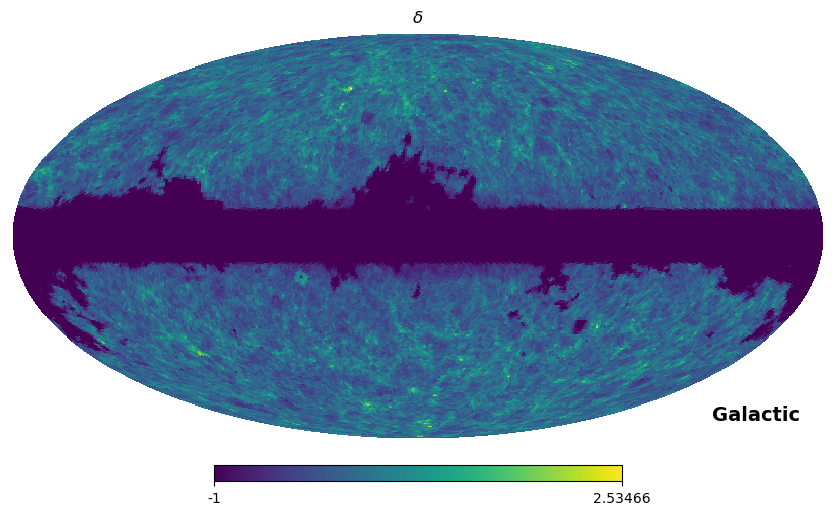

In [9]:
import healpy as hp
import numpy as np
nside=64
pix_N=hp.fitsfunc.read_map('/home/wangsy/code/WISExSCOS/wise_scos.fits', nest=False)
mask=hp.fitsfunc.read_map('/home/wangsy/code/WISExSCOS/wise_scos_mask.fits', nest=False)
# 生成delta_map
pix_area=hp.nside2pixarea(nside, degrees = True)
bar_N = np.sum(mask * pix_N) / (np.sum(mask) * pix_area)

delta = np.ones(hp.nside2npix(nside))
for i in range(hp.nside2npix(nside)):

    delta[i] = (pix_N[i] / bar_N) - 1

hp.mollview(delta, title='$\delta$', coord="CG")

# 与CHIME的数据的mask生成mask

In [3]:
mask_f1=hp.fitsfunc.read_map('/home/wangsy/code/FRB/random_data/mask1.fits', nest=False)
mask_f2=hp.fitsfunc.read_map('/home/wangsy/code/FRB/random_data/mask2.fits', nest=False)
mask_f3=hp.fitsfunc.read_map('/home/wangsy/code/FRB/random_data/mask3.fits', nest=False)
mask_g=hp.fitsfunc.read_map('/home/wangsy/code/WISExSCOS/wise_scos_mask.fits', nest=False)

mask_1=mask_f1 * mask_g
mask_2=mask_f2 * mask_g
mask_3=mask_f3 * mask_g

hp.fitsfunc.write_map('/home/wangsy/code/WISExSCOS/mask_map/mask_map1.fits', m=mask_1, nest=False, fits_IDL=64, coord='CG',overwrite=True)
hp.fitsfunc.write_map('/home/wangsy/code/WISExSCOS/mask_map/mask_map2.fits', m=mask_2, nest=False, fits_IDL=64, coord='CG',overwrite=True)
hp.fitsfunc.write_map('/home/wangsy/code/WISExSCOS/mask_map/mask_map3.fits', m=mask_3, nest=False, fits_IDL=64, coord='CG',overwrite=True)

setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
